In [4]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

df = pd.read_csv("Resources/cleaned_df.csv", low_memory=False)
df.head()
route_df = df[["OP_UNIQUE_CARRIER","ORIGIN","DEST","DEP_DELAY","DEP_DEL15","ARR_DELAY","ARR_DEL15"]]
route_df.head()

,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_DELAY,DEP_DEL15,ARR_DELAY,ARR_DEL15
0,DL,MSP,DEN,0.0,0.0,-16.0,0.0
1,DL,MSP,DTW,1.0,0.0,-8.0,0.0
2,DL,DTW,MSP,-4.0,0.0,-18.0,0.0
3,DL,MSP,LGA,-3.0,0.0,-31.0,0.0
4,DL,DEN,MSP,0.0,0.0,9.0,0.0


In [5]:
route_outbound_df = route_df.loc[route_df["ORIGIN"] == "MSP", :]
f = {"DEP_DEL15":["count","sum"],"ARR_DEL15":["count","sum"]}
route_outbound_delays_df=route_outbound_df.groupby("DEST").agg(f)
route_outbound_delays_df.columns=["dep_count","dep_sum","arr_count","arr_sum"]
route_outbound_delays_df = route_outbound_delays_df.loc[route_outbound_delays_df["dep_count"] >= 365, :]
route_outbound_delays_df["Percent of Delayed Departures"] = (route_outbound_delays_df["dep_sum"]/route_outbound_delays_df["dep_count"])*100
route_outbound_delays_df["Percent of Delayed Arrivals"] = (route_outbound_delays_df["arr_sum"]/route_outbound_delays_df["arr_count"])*100
route_outbound_delays_df_top_ten_dep = route_outbound_delays_df.sort_values(by="Percent of Delayed Departures", ascending=False).head(10)
route_outbound_delays_df_top_ten_arr = route_outbound_delays_df.sort_values(by="Percent of Delayed Arrivals", ascending=False).head(10)
route_outbound_delays_df_bot_ten_dep = route_outbound_delays_df.sort_values(by="Percent of Delayed Departures", ascending=True).head(10)
route_outbound_delays_df_bot_ten_arr = route_outbound_delays_df.sort_values(by="Percent of Delayed Arrivals", ascending=True).head(10)

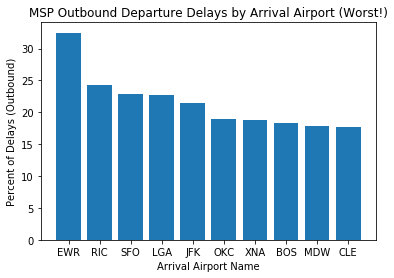

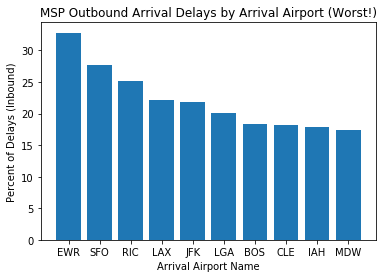

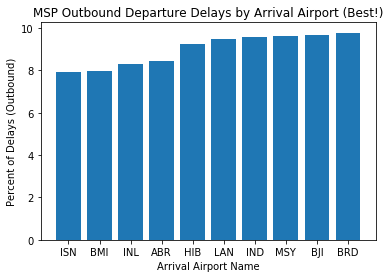

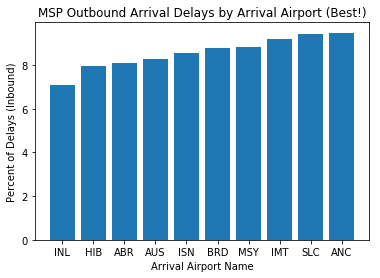

In [6]:
plt.bar(route_outbound_delays_df_top_ten_dep.index, route_outbound_delays_df_top_ten_dep["Percent of Delayed Departures"])
plt.ylabel("Percent of Delays (Outbound)")
plt.xlabel("Arrival Airport Name")
plt.title("MSP Outbound Departure Delays by Arrival Airport (Worst!)")
plt.savefig("Resources/Worst_Routes for_Departures_from_MSP.png")
plt.show()
plt.bar(route_outbound_delays_df_top_ten_arr.index, route_outbound_delays_df_top_ten_arr["Percent of Delayed Arrivals"])
plt.ylabel("Percent of Delays (Inbound)")
plt.xlabel("Arrival Airport Name")
plt.title("MSP Outbound Arrival Delays by Arrival Airport (Worst!)")
plt.savefig("Resources/Worst_Routes_for_Arrrvals_from_MSP.png")
plt.show()
plt.bar(route_outbound_delays_df_bot_ten_dep.index, route_outbound_delays_df_bot_ten_dep["Percent of Delayed Departures"])
plt.ylabel("Percent of Delays (Outbound)")
plt.xlabel("Arrival Airport Name")
plt.title("MSP Outbound Departure Delays by Arrival Airport (Best!)")
plt.savefig("Resources/Best_Routes_for_Departures_from_MSP.png")
plt.show()
plt.bar(route_outbound_delays_df_bot_ten_arr.index, route_outbound_delays_df_bot_ten_arr["Percent of Delayed Arrivals"])
plt.ylabel("Percent of Delays (Inbound)")
plt.xlabel("Arrival Airport Name")
plt.title("MSP Outbound Arrival Delays by Arrival Airport (Best!)")
plt.savefig("Resources/Best_Routes_for_Arrivals_from_MSP.png")
plt.show()

In [7]:
msp_inbound_df = route_df.loc[route_df["DEST"] == "MSP", :]
f = {"DEP_DEL15":["count","sum"],"ARR_DEL15":["count","sum"]}
msp_inbound_delays_df=msp_inbound_df.groupby("ORIGIN").agg(f)
msp_inbound_delays_df.columns=["dep_count","dep_sum","arr_count","arr_sum"]
msp_inbound_delays_df = msp_inbound_delays_df.loc[msp_inbound_delays_df["dep_count"] >= 365, :]
msp_inbound_delays_df["Percent of Delayed Departures"] = (msp_inbound_delays_df["dep_sum"]/msp_inbound_delays_df["dep_count"])*100
msp_inbound_delays_df["Percent of Delayed Arrivals"] = (msp_inbound_delays_df["arr_sum"]/msp_inbound_delays_df["arr_count"])*100
msp_inbound_delays_df_top_ten_dep = msp_inbound_delays_df.sort_values(by="Percent of Delayed Departures", ascending=False).head(10)
msp_inbound_delays_df_top_ten_arr = msp_inbound_delays_df.sort_values(by="Percent of Delayed Arrivals", ascending=False).head(10)
msp_inbound_delays_df_bot_ten_dep = msp_inbound_delays_df.sort_values(by="Percent of Delayed Departures", ascending=True).head(10)
msp_inbound_delays_df_bot_ten_arr = msp_inbound_delays_df.sort_values(by="Percent of Delayed Arrivals", ascending=True).head(10)

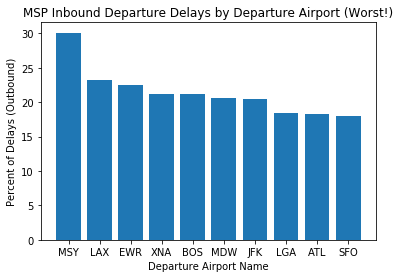

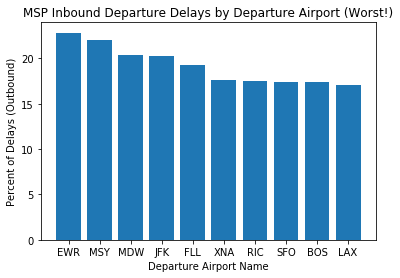

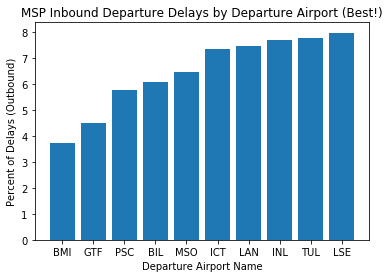

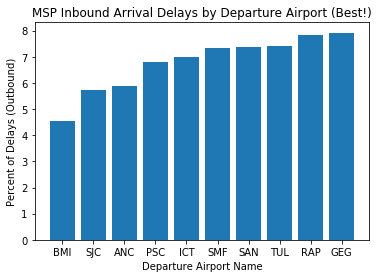

In [8]:
plt.bar(msp_inbound_delays_df_top_ten_dep.index, msp_inbound_delays_df_top_ten_dep["Percent of Delayed Departures"])
plt.ylabel("Percent of Delays (Outbound)")
plt.xlabel("Departure Airport Name")
plt.title("MSP Inbound Departure Delays by Departure Airport (Worst!)")
plt.savefig("Resources/Worst_Routes_for_Departures_to_MSP.png")
plt.show()
plt.bar(msp_inbound_delays_df_top_ten_arr.index, msp_inbound_delays_df_top_ten_arr["Percent of Delayed Arrivals"])
plt.ylabel("Percent of Delays (Outbound)")
plt.xlabel("Departure Airport Name")
plt.title("MSP Inbound Departure Delays by Departure Airport (Worst!)")
plt.savefig("Resources/Worst_Routes_for_Arrivals_to_MSP.png")
plt.show()
plt.bar(msp_inbound_delays_df_bot_ten_dep.index, msp_inbound_delays_df_bot_ten_dep["Percent of Delayed Departures"])
plt.ylabel("Percent of Delays (Outbound)")
plt.xlabel("Departure Airport Name")
plt.title("MSP Inbound Departure Delays by Departure Airport (Best!)")
plt.savefig("Resources/Best_Routes_for_Departures_to_MSP.png")
plt.show()
plt.bar(msp_inbound_delays_df_bot_ten_arr.index, msp_inbound_delays_df_bot_ten_arr["Percent of Delayed Arrivals"])
plt.ylabel("Percent of Delays (Outbound)")
plt.xlabel("Departure Airport Name")
plt.title("MSP Inbound Arrival Delays by Departure Airport (Best!)")
plt.savefig("Resources/Best_Routes_for_Arrivals_to_MSP.png")
plt.show()

In [9]:
new_route_df = df[["OP_UNIQUE_CARRIER","ORIGIN_AIRPORT","DEST_AIRPORT","DEP_DELAY","DEP_DEL15","ARR_DELAY","ARR_DEL15", "CRS_ARR_TIME", "ARR_TIME"]]
new_route_df.head()
sched_vs_act_arrival_df = new_route_df.loc[new_route_df["ORIGIN_AIRPORT"] == "Minneapolis-Saint Paul International Airport", :]
sched_vs_act_arrival_df = sched_vs_act_arrival_df.loc[sched_vs_act_arrival_df["DEP_DEL15"] == 1, :]
sched_vs_act_arrival_df.head()

,OP_UNIQUE_CARRIER,ORIGIN_AIRPORT,DEST_AIRPORT,DEP_DELAY,DEP_DEL15,ARR_DELAY,ARR_DEL15,CRS_ARR_TIME,ARR_TIME
34,DL,Minneapolis-Saint Paul International Airport,Salt Lake City International Airport,129.0,1.0,104.0,1.0,1625,1809.0
37,DL,Minneapolis-Saint Paul International Airport,Detroit Metropolitan Airport,25.0,1.0,-3.0,0.0,2301,2258.0
62,DL,Minneapolis-Saint Paul International Airport,Orlando International Airport,18.0,1.0,15.0,1.0,30,45.0
71,DL,Minneapolis-Saint Paul International Airport,San Francisco International Airport,100.0,1.0,71.0,1.0,1407,1518.0
74,DL,Minneapolis-Saint Paul International Airport,San Diego International Airport (Lindbergh Field),31.0,1.0,0.0,0.0,1615,1615.0


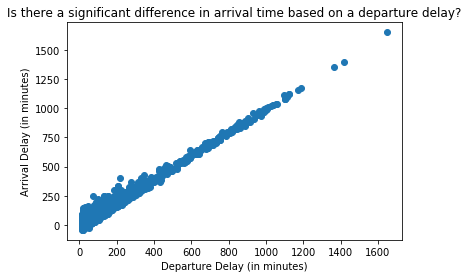

In [10]:
plt.scatter(sched_vs_act_arrival_df["DEP_DELAY"], sched_vs_act_arrival_df["ARR_DELAY"])
plt.ylabel("Arrival Delay (in minutes)")
plt.xlabel("Departure Delay (in minutes)")
plt.title("Is there a significant difference in arrival time based on a departure delay?")
plt.savefig("Resources/Dep_Del_vs_Arr_Del.png")
plt.show()